**Outline**

**Import Data**

<br>**EDA**

<br>**Model 1**
<br>**1. Random Forest**: Gridsearch, Model Prediction, Model Validation
<br>**2. XGBoost**: Gridsearch, Model Prediction, Model Validation
<br>**3. Random Forest Model Deployment on Test Data**

<br>**Model 2**
<br>**1. Random Forest**: Gridsearch, Model Prediction, Model Validation
<br>**2. XGBoost**: Gridsearch, Model Prediction, Model Validation
<br>**3. XGBoost Model Deployment on Test Data**


In [1]:
import pandas as pd
import joblib 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from pathlib import Path


# Import data

In [2]:
file_path = Path("/Users/lorelablaka/Documents/Flatiron/phase-5/capstone/collect_clean")
data_viz = joblib.load(f"{file_path}/data2_viz.pkl")

data = joblib.load(f"{file_path}/data2.pkl")

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3848 entries, 1 to 6433
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ticker        3848 non-null   object 
 1   sector        3848 non-null   object 
 2   vc_dummy      3848 non-null   object 
 3   rollup        3848 non-null   object 
 4   dual          3848 non-null   object 
 5   internet      3848 non-null   object 
 6   years_to_ipo  3848 non-null   int64  
 7   day_1_%       3848 non-null   float64
 8   month_7_%     1323 non-null   float64
 9   successful    3848 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 330.7+ KB


# EDA

**EDA of Dependent Variable**

In [3]:
data['successful'].value_counts()

0    2704
1    1144
Name: successful, dtype: int64

In [4]:
data_viz[data_viz['sector']=='Conglomerates']

,ticker,trade_date,ipo_year,day_1_%,month_7_%,sector,vc_dummy,rollup,dual,internet,...,ebitda_margins,profit_margins,gross_margins,revenue_growth,total_revenue,operating_cashflow,profitable,valuable,success,successful
4490,PRLX,2010-03-10,2010,0.246575,-0.479167,Conglomerates,0,0,0,0,...,0.0,0.0,0.86915,50.369,128600.0,-2945573.0,1,1,2,1


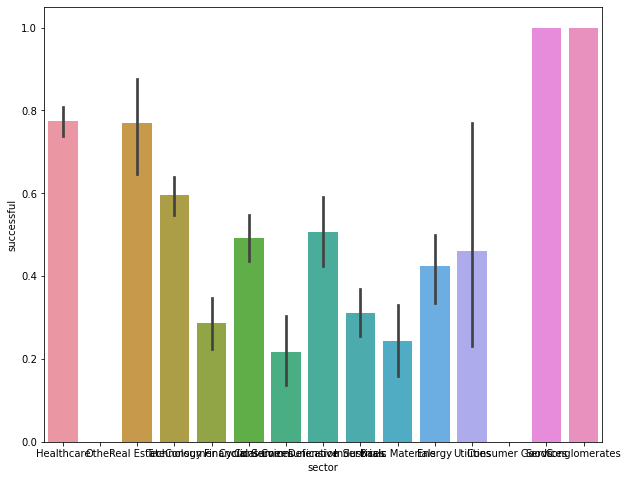

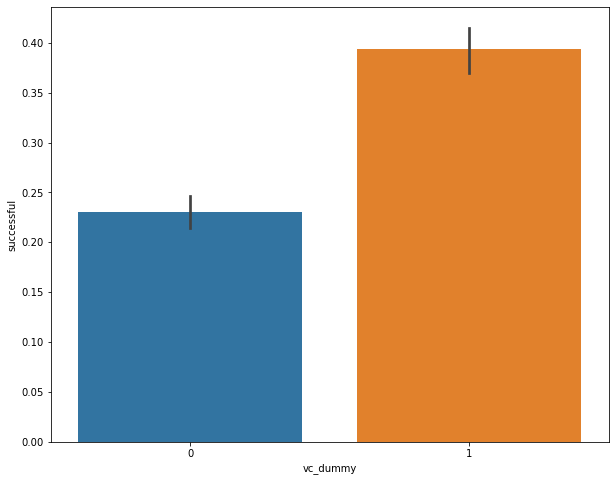

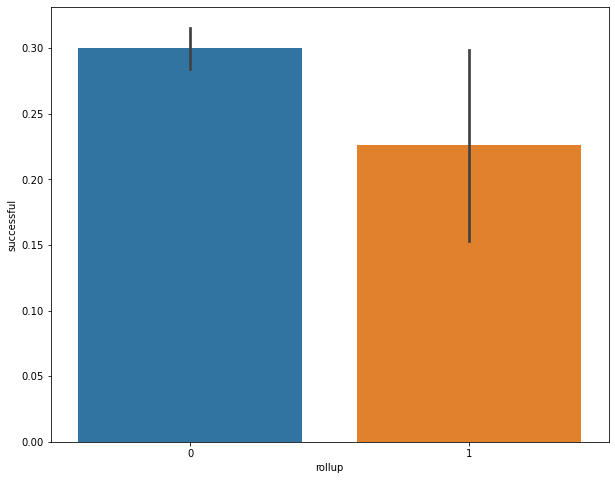

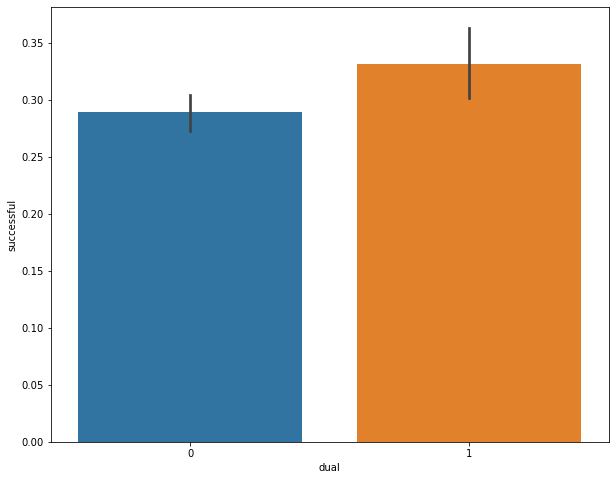

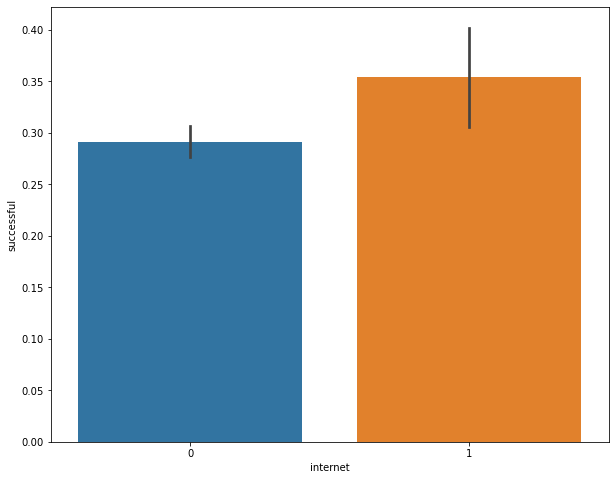

In [5]:
discrete_features = ['sector','vc_dummy', 'rollup', 'dual', 'internet']
data_viz.replace('2','1', inplace=True)
for feature in discrete_features:
    plt.figure(figsize=(10,8))
    sns.barplot(x=feature, y='successful', data=data_viz)

In [6]:
data[(data['ticker']=='UBER')]

,ticker,sector,vc_dummy,rollup,dual,internet,years_to_ipo,day_1_%,month_7_%,successful
5868,UBER,Technology,1,0,0,1,10,-0.010238,NaN,1


<BarContainer object of 2 artists>

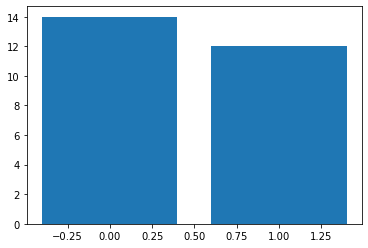

In [7]:
data_viz_margin = data_viz.groupby('successful').aggregate({'years_to_ipo':'median'})
data_viz_margin.reset_index(inplace=True)
data_viz_margin  



x = data_viz_margin['successful']
height = data_viz_margin['years_to_ipo']

plt.bar(x,height)

**Gross Margin by sector**

<BarContainer object of 13 artists>

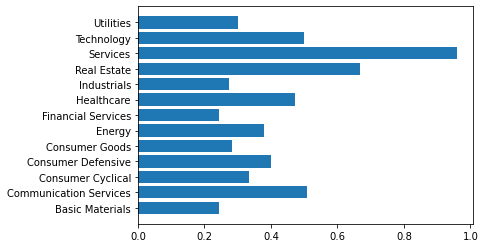

In [8]:
data_viz_margin = data_viz.groupby('sector').aggregate({'gross_margins':'median'})
data_viz_margin.reset_index(inplace=True)
data_viz_margin = data_viz_margin[(data_viz_margin['gross_margins']>0)
                                 &( data_viz_margin['sector']!= 'Conglomerates')]



x = data_viz_margin['sector']
height = data_viz_margin['gross_margins']

plt.barh(x,height)
 

**Enterprise Value to Revenue by sector**

<BarContainer object of 12 artists>

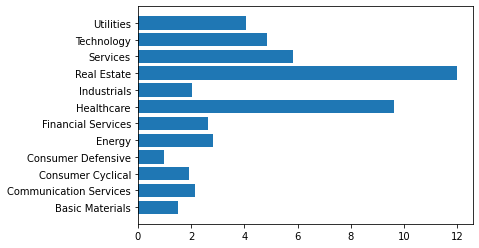

In [9]:
data_viz_evr = data_viz.groupby('sector').aggregate({'enterprise_to_revenue':'median'})
data_viz_evr.reset_index(inplace=True)
data_viz_evr = data_viz_evr[(data_viz_evr['enterprise_to_revenue']>0)
                                 &( data_viz_evr['sector']!= 'Conglomerates')]

x = data_viz_evr['sector']
height = data_viz_evr['enterprise_to_revenue']

plt.barh(x,height)


**# of IPOs per year** (in this dataset)

<AxesSubplot:xlabel='ipo_year'>

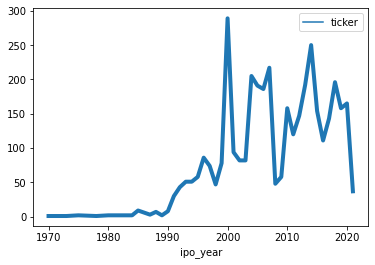

In [10]:
data_viz_return = data_viz.groupby('ipo_year').aggregate({'ticker':'count'})
data_viz_return = data_viz.groupby('ipo_year').aggregate({'ticker':'count'})


 
fig, ax = plt.subplots()
sns.lineplot(data=data_viz_return, linewidth=4)


**Relationship b.w Month 7 Returns vs first day pop** is weak

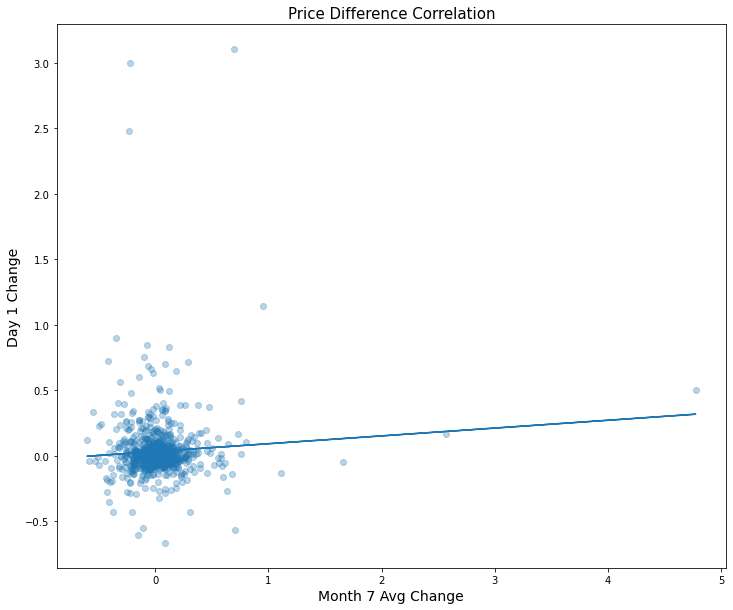

In [11]:
data_viz = data_viz[(data_viz['month_7_%']<10)
                   & (data_viz['day_1_%']<5)
                   & (data_viz['day_1_%']!=0)
                   & (data_viz['month_7_%']!=0)]
    
    
x = data_viz['month_7_%']
y = data_viz['day_1_%']

fig, ax = plt.subplots()
ax.set_title('Price Difference Correlation', fontsize=15)
ax.set_xlabel('Month 7 Avg Change', fontsize=14)
ax.set_ylabel('Day 1 Change', fontsize=14)

plt.scatter(x,y, marker="o",alpha=0.3)
fig.set_size_inches(12, 10);
 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,alpha=1)

plt.show()

**"Successful" companies by sector**
> The horizontal bar graph attempts to validate our definition of success by making sure profitable sectors such as technology actually rank as most successful. Which they do as we can see below. 

/Users/lorelablaka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


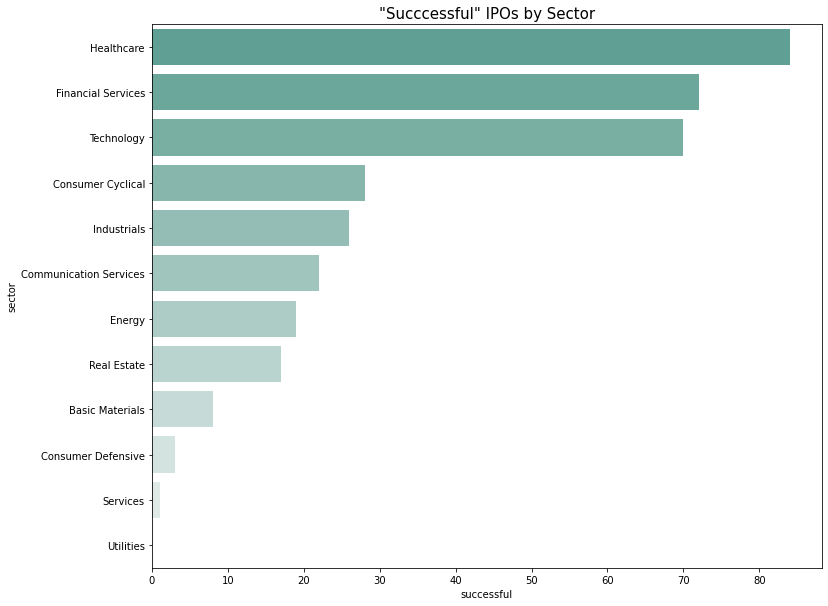

In [12]:
data_viz_evr = data_viz.groupby('sector').aggregate({'successful':'sum'})
data_viz_evr.reset_index(inplace=True)
data_viz_evr = data_viz_evr[( data_viz_evr['sector']!= 'Conglomerates') &
                            (data_viz_evr['sector']!= 'Other')].sort_values('successful',axis=0,ascending=False)
x =  data_viz_evr['successful'] 
height =data_viz_evr['sector']
fig, ax = plt.subplots()
ax.set_title('"Succcessful" IPOs by Sector', fontsize=15)

sns.barplot(x,height,data=data_viz_evr,palette='light:#5A9_r')
fig.set_size_inches(12, 10);



# Train Test Split

In [13]:
x_feats = ['sector',
           'day_1_%', 
           'vc_dummy', 
           'rollup', 
           'dual', 
           'internet',
           'years_to_ipo'
           ]

  

X = pd.get_dummies(data[x_feats], drop_first=True)
y = data['successful'].astype(int)
X.head()

,day_1_%,years_to_ipo,sector_Communication Services,sector_Conglomerates,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Consumer Goods,sector_Energy,sector_Financial Services,sector_Healthcare,...,sector_Real Estate,sector_Services,sector_Technology,sector_Utilities,vc_dummy_1,vc_dummy_2,rollup_1,dual_1,dual_2,internet_1
1,-0.032967,50,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.324324,13,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0.001200,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,-0.167247,98,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
12,-0.043988,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.3)

# Random Forest

In [15]:
rf = RandomForestClassifier()

grid = {'n_estimators': [25, 50, 100], 
        'max_depth' : [10, 15, 20], 
        'min_samples_leaf' : [3, 6, 9]} 
 
gridsearch = GridSearchCV(rf,grid,cv = 3, return_train_score=True)

gridsearch.fit(X_train, y_train) 



 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [3, 6, 9],
                         'n_estimators': [25, 50, 100]},
             return_train_score=True)

In [16]:

print(gridsearch.best_params_)

{'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 100}


In [17]:

# define the model
ran_for = RandomForestClassifier(n_estimators = 100,
                              max_depth = 10, 
                              min_samples_leaf = 3)

# fit the model
ran_for.fit(X_train, y_train)
y_hat_train = ran_for.predict(X_train)

**Model 1 RF Evaluation**

In [18]:
acc = accuracy_score(y_train,y_hat_train)
macro_precision_score=precision_score(y_train, y_hat_train, average='macro')
micro_precision_score=precision_score(y_train , y_hat_train, average='micro')
macro_recall_score=recall_score(y_train, y_hat_train, average='macro')
micro_recall_score=recall_score(y_train, y_hat_train, average='micro')

print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))

Accuracy Score: 0.8548087634608244
Macro Precision Score: 0.8386389233813498
Micro Precision Score: 0.8548087634608244
Macro Recall Score: 0.8021770998415214
Micro Recall Score: 0.8548087634608244


In [19]:
scoring = ['precision_macro', 'precision_micro','accuracy']
scores = cross_validate(ran_for, X, y, scoring=scoring)

precision_macro_list = list(scores['test_precision_macro'])
precision_macro_avg = sum(precision_macro_list)/len(precision_macro_list)


precision_micro_list = list(scores['test_precision_micro'])
precision_micro_avg = sum(precision_micro_list)/len(precision_micro_list)


accuracy_list = list(scores['test_accuracy'])
accuracy_avg = sum(accuracy_list)/len(accuracy_list)

print('Macro Precision Score: {}'.format(precision_macro_avg))
print('Micro Precision Score: {}'.format(precision_micro_avg))
print('Accuracy Score: {}'.format(accuracy_avg))

Macro Precision Score: 0.775221157727515
Micro Precision Score: 0.8071724114636989
Accuracy Score: 0.8071724114636989


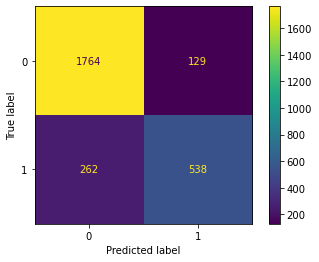

In [20]:
rf_matrix = plot_confusion_matrix(ran_for,X_train, y_train)

# XGBoost

In [21]:
# We ran the following GridSearch for XGBClassifier to find the optimal hyperparameter values.

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric ='mlogloss')

grid = {'max_depth': [6, 12, 20], 
        'min_child_weight' : [.5, 1], 
        'reg_alpha': [0,30],
       'gamma': [5,10,15]} 

 
gridsearch = GridSearchCV(xgb,grid,cv = 3, return_train_score=True)

gridsearch.fit(X_train, y_train) 


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=N

In [22]:
print(gridsearch.best_params_)

{'gamma': 5, 'max_depth': 6, 'min_child_weight': 0.5, 'reg_alpha': 30}


In [23]:
boost_model = XGBClassifier( 
    max_depth = 6,
    min_child_weight = 0.5,
    gamma = 5,
    eval_metric='mlogloss',
    use_label_encoder=False
)


boost_model.fit(X_train, y_train)
print("fit model")
    
y_hat_train = boost_model.predict(X_train)
print("predicted on model")

fit model
predicted on model


**Model 1 XGB Evaluation**

In [24]:
acc = accuracy_score(y_train,y_hat_train)
macro_precision_score=precision_score(y_train, y_hat_train, average='macro')
micro_precision_score=precision_score(y_train , y_hat_train, average='micro')
macro_recall_score=recall_score(y_train, y_hat_train, average='macro')
micro_recall_score=recall_score(y_train, y_hat_train, average='micro')

print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))

Accuracy Score: 0.831043445971036
Macro Precision Score: 0.8016382814690216
Micro Precision Score: 0.831043445971036
Macro Recall Score: 0.7841901082937137
Micro Recall Score: 0.831043445971036


In [25]:
scoring = ['precision_macro', 'precision_micro','accuracy']
scores = cross_validate(boost_model, X, y, scoring=scoring)

precision_macro_list = list(scores['test_precision_macro'])
precision_macro_avg = sum(precision_macro_list)/len(precision_macro_list)


precision_micro_list = list(scores['test_precision_micro'])
precision_micro_avg = sum(precision_micro_list)/len(precision_micro_list)


accuracy_list = list(scores['test_accuracy'])
accuracy_avg = sum(accuracy_list)/len(accuracy_list)

print('Macro Precision Score: {}'.format(precision_macro_avg))
print('Micro Precision Score: {}'.format(precision_micro_avg))
print('Accuracy Score: {}'.format(accuracy_avg))

Macro Precision Score: 0.7670473889235804
Micro Precision Score: 0.80119973654434
Accuracy Score: 0.80119973654434


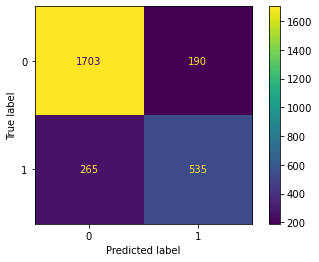

In [26]:
xgb_matrix = plot_confusion_matrix(boost_model,X_train, y_train)

# **Model 1 Deployment on Test Data**

**Random Forest** was the better performing model 

In [27]:
ran_for = RandomForestClassifier(n_estimators = 100,
                              max_depth = 10, 
                              min_samples_leaf = 3)

ran_for.fit(X_train, y_train)
print("fit model")
    


fit model


In [28]:
y_hat_test = boost_model.predict(X_test)
print("predicted on model")

predicted on model


In [29]:
acc = accuracy_score(y_test, y_hat_test)
macro_precision_score=precision_score(y_test, y_hat_test, average='macro')
micro_precision_score=precision_score(y_test, y_hat_test, average='micro')
macro_recall_score=recall_score(y_test, y_hat_test, average='macro')
micro_recall_score=recall_score(y_test, y_hat_test, average='micro')

print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))


Accuracy Score: 0.793939393939394
Macro Precision Score: 0.7541727949369346
Micro Precision Score: 0.793939393939394
Macro Recall Score: 0.7452990135635018
Micro Recall Score: 0.793939393939394


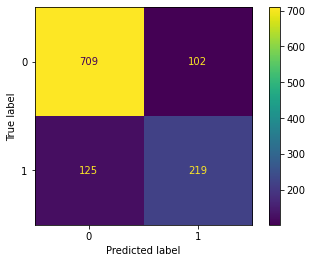

In [30]:
xgb_matrix = plot_confusion_matrix(ran_for,X_test, y_test)

# Model 2

In [31]:
data= data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 1 to 6433
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ticker        1323 non-null   object 
 1   sector        1323 non-null   object 
 2   vc_dummy      1323 non-null   object 
 3   rollup        1323 non-null   object 
 4   dual          1323 non-null   object 
 5   internet      1323 non-null   object 
 6   years_to_ipo  1323 non-null   int64  
 7   day_1_%       1323 non-null   float64
 8   month_7_%     1323 non-null   float64
 9   successful    1323 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 113.7+ KB


In [32]:
x_feats = ['sector',
           'day_1_%', 
           'month_7_%',
           'vc_dummy', 
           'rollup', 
           'dual', 
           'internet',
           'years_to_ipo'
           ]

  

X = pd.get_dummies(data[x_feats], drop_first=True)
y = data['successful'].astype(int)
X.head()

,day_1_%,month_7_%,years_to_ipo,sector_Communication Services,sector_Conglomerates,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,...,sector_Other,sector_Real Estate,sector_Services,sector_Technology,sector_Utilities,vc_dummy_1,vc_dummy_2,rollup_1,dual_1,internet_1
1,-0.032967,-0.009236,50,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,-0.167247,-0.078261,98,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
12,-0.043988,-0.193333,23,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
16,0.036853,-0.056920,30,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,-0.004292,-0.124130,8,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Random Forest

In [34]:
rf = RandomForestClassifier()

grid = {'n_estimators': [25, 50, 100], 
        'max_depth' : [10, 15, 20], 
        'min_samples_leaf' : [3, 6, 9]} 
 
gridsearch = GridSearchCV(rf,grid,cv = 3, return_train_score=True)

gridsearch.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [3, 6, 9],
                         'n_estimators': [25, 50, 100]},
             return_train_score=True)

In [35]:
print(gridsearch.best_params_)

{'max_depth': 10, 'min_samples_leaf': 9, 'n_estimators': 100}


In [36]:
# random forest for feature importance on a regression problem

# define the model
ran_for = RandomForestClassifier(n_estimators = 50,
                              max_depth = 10, 
                              min_samples_leaf = 6)

# fit the model
ran_for.fit(X_train, y_train)
y_hat_train = ran_for.predict(X_train)

**Model 2 RF Evaluation**

In [37]:
acc = accuracy_score(y_train,y_hat_train)
macro_precision_score=precision_score(y_train, y_hat_train, average='macro')
micro_precision_score=precision_score(y_train , y_hat_train, average='micro')
macro_recall_score=recall_score(y_train, y_hat_train, average='macro')
micro_recall_score=recall_score(y_train, y_hat_train, average='micro')

print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))

Accuracy Score: 0.7691532258064516
Macro Precision Score: 0.758736559139785
Micro Precision Score: 0.7691532258064516
Macro Recall Score: 0.7133011639076916
Micro Recall Score: 0.7691532258064516


In [38]:
scoring = ['precision_macro', 'precision_micro','accuracy']
scores = cross_validate(ran_for, X, y, scoring=scoring)

precision_macro_list = list(scores['test_precision_macro'])
precision_macro_avg = sum(precision_macro_list)/len(precision_macro_list)


precision_micro_list = list(scores['test_precision_micro'])
precision_micro_avg = sum(precision_micro_list)/len(precision_micro_list)


accuracy_list = list(scores['test_accuracy'])
accuracy_avg = sum(accuracy_list)/len(accuracy_list)

print('Macro Precision Score: {}'.format(precision_macro_avg))
print('Micro Precision Score: {}'.format(precision_micro_avg))
print('Accuracy Score: {}'.format(accuracy_avg))

Macro Precision Score: 0.6904994041482018
Micro Precision Score: 0.7150343053173241
Accuracy Score: 0.7150343053173241


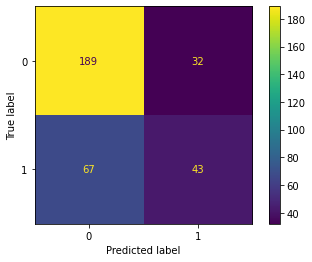

In [39]:
rf_matrix = plot_confusion_matrix(ran_for,X_test, y_test)

# XGBoost

In [40]:
# We ran the following GridSearch for XGBClassifier to find the optimal hyperparameter values.

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric ='mlogloss')

grid = {'max_depth': [6, 12, 20], 
        'min_child_weight' : [.5, 1], 
        'reg_alpha': [0,30],
       'gamma': [5,10,15]} 

 
gridsearch = GridSearchCV(xgb,grid,cv = 3, return_train_score=True)

gridsearch.fit(X_train, y_train) 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=N

In [41]:
print(gridsearch.best_params_)

{'gamma': 5, 'max_depth': 6, 'min_child_weight': 1, 'reg_alpha': 0}


In [42]:
boost_model = XGBClassifier( 
    max_depth = 6,
    min_child_weight = 1,
    gamma = 5,
    eval_metric='mlogloss',
    use_label_encoder=False
)

boost_model.fit(X_train, y_train)
print("fit model")
    
y_hat_train = boost_model.predict(X_train)
print("predicted on model")

fit model
predicted on model


**Model 2 XGBoost Validation**

In [43]:
acc = accuracy_score(y_train,y_hat_train)
macro_precision_score=precision_score(y_train, y_hat_train, average='macro')
micro_precision_score=precision_score(y_train , y_hat_train, average='micro')
macro_recall_score=recall_score(y_train, y_hat_train, average='macro')
micro_recall_score=recall_score(y_train, y_hat_train, average='micro')

print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))

Accuracy Score: 0.7711693548387096
Macro Precision Score: 0.7691663393331638
Micro Precision Score: 0.7711693548387096
Macro Recall Score: 0.7081942675870696
Micro Recall Score: 0.7711693548387096


In [44]:
scoring = ['precision_macro', 'precision_micro','accuracy']
scores = cross_validate(boost_model, X, y, scoring=scoring)

precision_macro_list = list(scores['test_precision_macro'])
precision_macro_avg = sum(precision_macro_list)/len(precision_macro_list)


precision_micro_list = list(scores['test_precision_micro'])
precision_micro_avg = sum(precision_micro_list)/len(precision_micro_list)


accuracy_list = list(scores['test_accuracy'])
accuracy_avg = sum(accuracy_list)/len(accuracy_list)

print('Macro Precision Score: {}'.format(precision_macro_avg))
print('Micro Precision Score: {}'.format(precision_micro_avg))
print('Accuracy Score: {}'.format(accuracy_avg))

Macro Precision Score: 0.677376487385615
Micro Precision Score: 0.705980560320183
Accuracy Score: 0.705980560320183


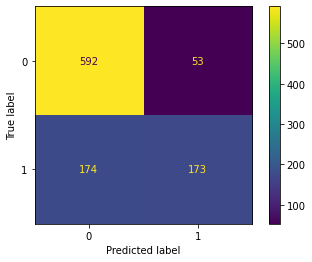

In [45]:
rgb_matrix = plot_confusion_matrix(boost_model,X_train, y_train)

# **Model 2 Deployment on Test Data**

**XGBoost** was the better performing model 

In [46]:
boost_model = XGBClassifier( 
    max_depth = 6,
    min_child_weight = 1,
    gamma = 5,
    eval_metric='mlogloss',
    use_label_encoder=False
)
boost_model.fit(X_train, y_train)
print("fit model")

fit model


In [47]:
y_hat_test = boost_model.predict(X_test)
print("predicted on model")

predicted on model


In [48]:
acc = accuracy_score(y_test, y_hat_test)
macro_precision_score=precision_score(y_test, y_hat_test, average='macro')
micro_precision_score=precision_score(y_test, y_hat_test, average='micro')
macro_recall_score=recall_score(y_test, y_hat_test, average='macro')
micro_recall_score=recall_score(y_test, y_hat_test, average='micro')

print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))

Accuracy Score: 0.6827794561933535
Macro Precision Score: 0.6288029649297489
Micro Precision Score: 0.6827794561933535
Macro Recall Score: 0.5957836281365693
Micro Recall Score: 0.6827794561933535


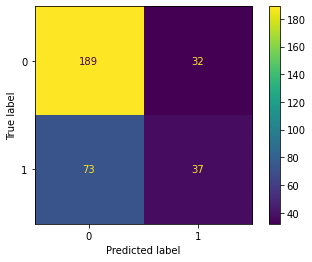

In [49]:
rf_matrix = plot_confusion_matrix(boost_model,X_test, y_test)